# pydantic

🧠 Understanding the Pydantic BaseModel Example
This code demonstrates how to use Pydantic, a data validation and settings management library in Python. Pydantic allows you to define data models with built-in validation using Python type hints.

In [1]:
from pydantic import BaseModel

class Person(BaseModel):
    name: str
    age: int
    city: str

In [2]:
person=Person(name="Sanjaya",age=42,city="")
print(person)

name='Sanjaya' age=42 city=''


In [ ]:
type(person)  

__main__.Person

It confirms that person is an instance of the Person class.

🔍 Difference Between dataclass and Pydantic BaseModel
Python offers two popular ways to define structured data objects:

✅ Using Pydantic’s BaseModel

✅ Using Python’s built-in @dataclass

Below is a detailed comparison of the two based on your code examples.

In [16]:
from dataclasses import dataclass
@dataclass
class Person1:
    name: str
    age: int
    city: str

person1=Person1(name="Sanjaya",age=42,city=12)
print(person1)
print(type(person1))

Person1(name='Sanjaya', age=42, city=12)
<class '__main__.Person1'>


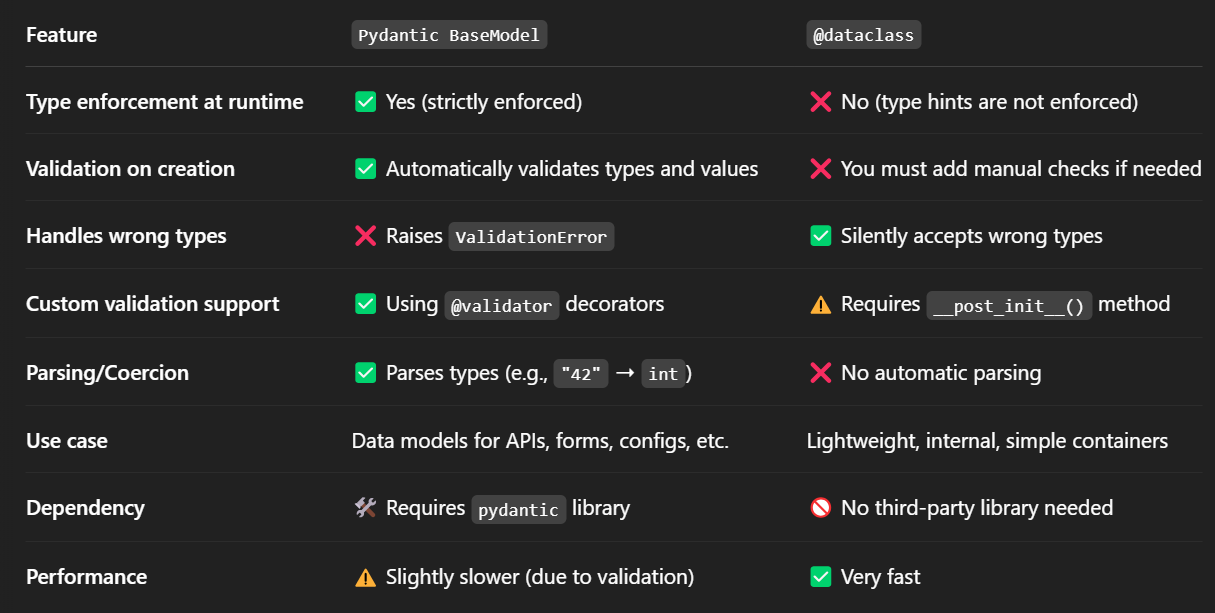

🧠 Understanding Optional Fields in Pydantic Models
The following code defines an Employee model using Pydantic’s BaseModel, with some fields marked as optional using Python’s Optional type hint.

These fields use Optional[...], which is a shorthand for Union[<type>, None]. It means:

The field can be of the given type (e.g., float, bool) or it can be None.

The presence of a default value (= None, = True) makes them not required when creating an object.



In [4]:
from typing import Optional
class Employee(BaseModel):
    id: int
    name: str
    department: str
    salary: Optional[float] = None
    is_active: Optional[bool] = True


In [6]:
emp1=Employee(id=1, name="John Doe", department="HR")
print(emp1)

id=1 name='John Doe' department='HR' salary=None is_active=True


In [20]:
emp2=Employee(id=2, name="Jane Smith", department="IT", salary=75000, is_active=False)
print(emp2)

id=2 name='Jane Smith' department='IT' salary=75000.0 is_active=False


🧾 Understanding List[str] in Pydantic Models
The List[str] type hint plays a crucial role in defining fields that accept multiple values in Pydantic models. In your Classroom model, it’s used to represent a list of student names.

In [13]:
from typing import List

class Classroom(BaseModel):
    room_number: str
    capacity: int
    students: List[str]

In [14]:
classroom = Classroom(
    room_number="101", 
    capacity="123", 
    students=["Alice", "Bob" , "Charlie"]
)

print(classroom)

room_number='101' capacity=123 students=['Alice', 'Bob', 'Charlie']


🧪 Handling Validation Errors in Pydantic with try-except
This code demonstrates how to catch and handle data validation errors raised by Pydantic when invalid input is passed to a model.

In [16]:
try:
    invalid_classroom = Classroom(
        room_number="102", 
        capacity=30,  # Invalid type
        students=["David", 12]
    )

except ValueError as e:
    print(e)

1 validation error for Classroom
students.1
  Input should be a valid string [type=string_type, input_value=12, input_type=int]
    For further information visit https://errors.pydantic.dev/2.11/v/string_type


Models with nested models

In [39]:
from pydantic import BaseModel

class Address(BaseModel):
    street: str
    city: str
    zip_code: str

class User(BaseModel):
    customer_id: int
    name: str
    address: Address

customer=User(
    customer_id=1, 
    name="John Doe", 
    address=Address(street="123 Main St", city="New York", zip_code="Hello")
)   

print(customer)

customer_id=1 name='John Doe' address=Address(street='123 Main St', city='New York', zip_code='Hello')


🎯 Pydantic Field Customization Using Field(...)
In this example, you're using Pydantic’s powerful Field() function to apply validation constraints to model fields. These constraints ensure that each field adheres to specific rules when a model instance is created.

In [42]:
from pydantic import BaseModel, Field

class Product(BaseModel):
    name:str=Field(min_length=2, max_length=50)
    price: float=Field(gt=0, le=1000)
    quantity: int=Field(ge=0)

product=Product(name="Laptop", price=999.99, quantity=1)
print(product)                                          

name='Laptop' price=999.99 quantity=1


🧠 Understanding Default Values in Pydantic Models
This example demonstrates how to use default values, default_factory, and field descriptions in a Pydantic model to build a robust and user-friendly data schema.

In [43]:
from pydantic import BaseModel, Field

class User(BaseModel):
    username: str=Field(...,description= "Unique username")
    age: int=Field(default=18, description="Age of the user")
    email: str=Field(default_factory=lambda:"abc@xyz.com", description="Email address of the user")


user1=User(username="sanjaya")
print(user1)

user2=User(username="bob",age=25,email="sanjaya@gmail.com")
print(user2)

   

username='sanjaya' age=18 email='abc@xyz.com'
username='bob' age=25 email='sanjaya@gmail.com'


🧾 User.model_json_schema() in Pydantic
The method User.model_json_schema() returns the JSON Schema representation of the Pydantic model. This is extremely useful for:

🛠️ Generating API documentation

📄 Schema validation in OpenAPI and JSON-based APIs

🔐 Validating input/output in systems that use structured data



In [45]:
print(User.model_json_schema())

{'properties': {'username': {'description': 'Unique username', 'title': 'Username', 'type': 'string'}, 'age': {'default': 18, 'description': 'Age of the user', 'title': 'Age', 'type': 'integer'}, 'email': {'description': 'Email address of the user', 'title': 'Email', 'type': 'string'}}, 'required': ['username'], 'title': 'User', 'type': 'object'}
